In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_excel("EastWestAirlines.xlsx",sheet_name = "data")

In [8]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Data Preprocessing

In [9]:
data.shape

(3999, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [11]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [14]:
data.agg(["var","skew","kurtosis","median"])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
var,1.347374e+06,1.015573e+10,598555.682228,1.895907,0.021801,0.038119,5.832692e+08,92.233173,1.960586e+06,14.388157,4.264781e+06,0.233247
skew,-3.342737e-03,5.004187e+00,7.512395,0.857569,11.210459,17.195532,2.842093e+00,1.157362,7.451666e+00,5.490461,1.201736e-01,0.537200
kurtosis,-1.199648e+00,4.415793e+01,67.689351,-0.748508,133.786489,308.654728,1.363049e+01,2.745737,9.476102e+01,42.978152,-9.675054e-01,-1.712272
median,2.016000e+03,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7.171000e+03,12.000000,0.000000e+00,0.000000,4.096000e+03,0.000000


In [15]:
#dropping ID# column
data.drop("ID#",axis=1,inplace = True)

## EDA

In [16]:
sns.set_style(style = "darkgrid")

#### Histogram

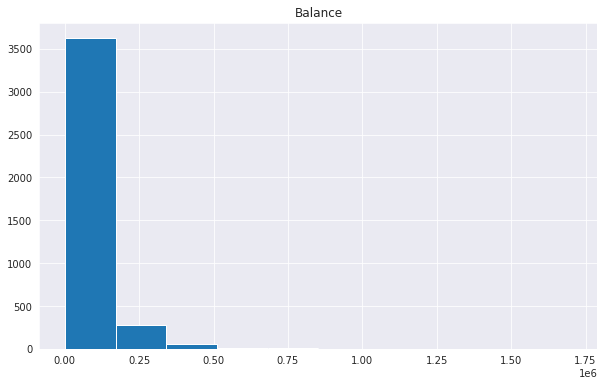

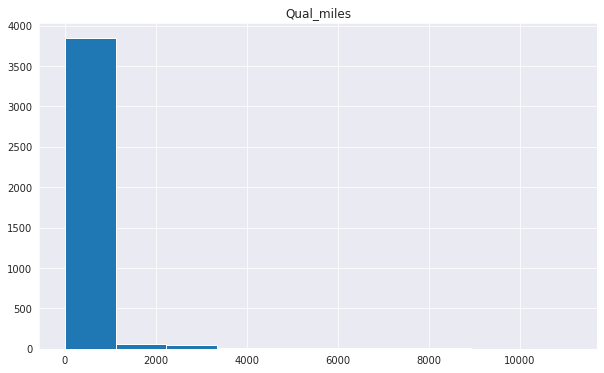

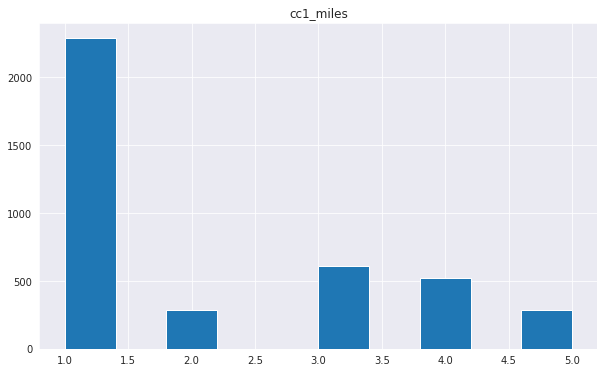

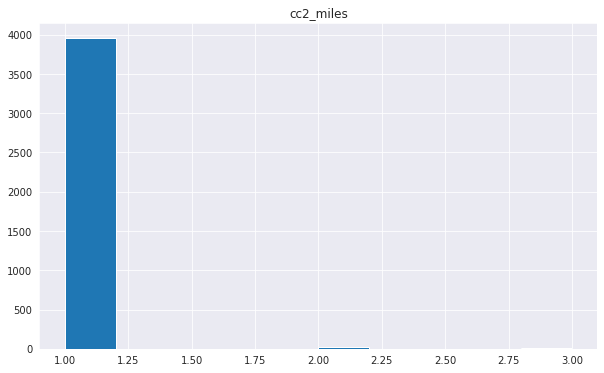

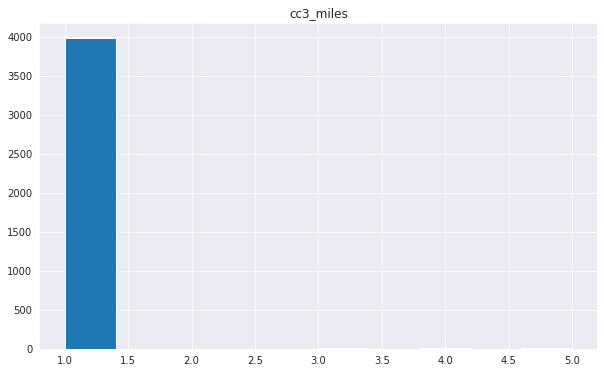

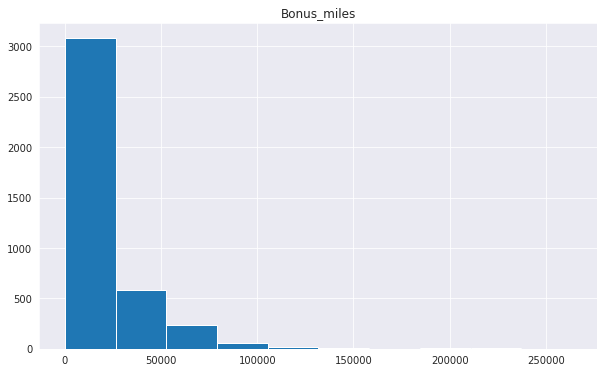

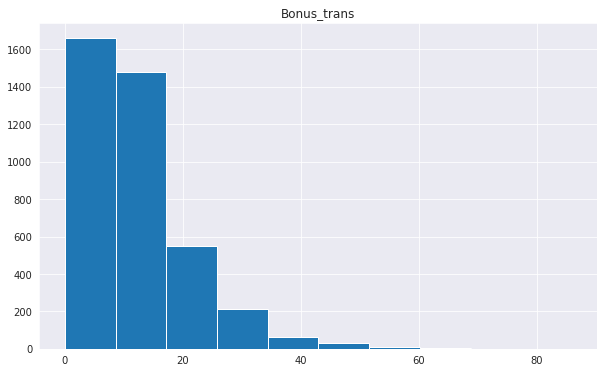

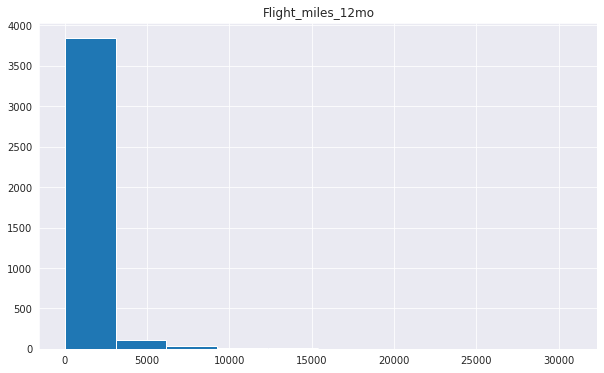

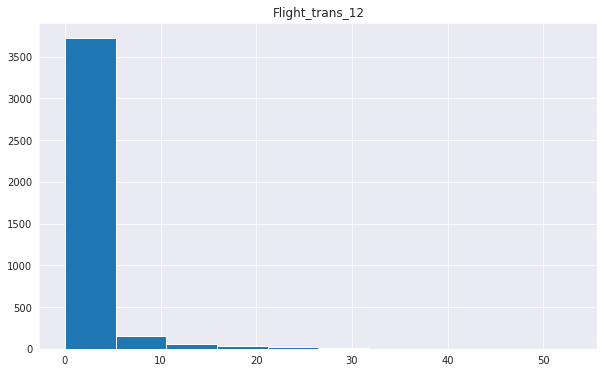

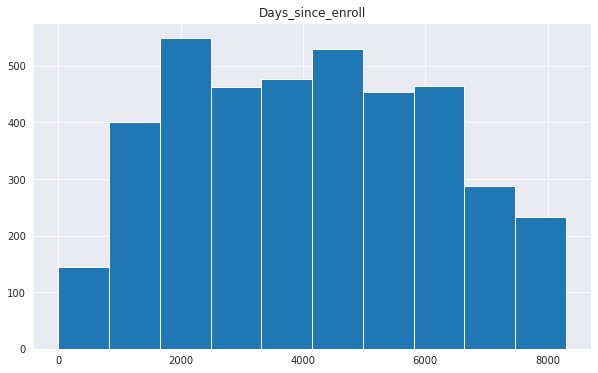

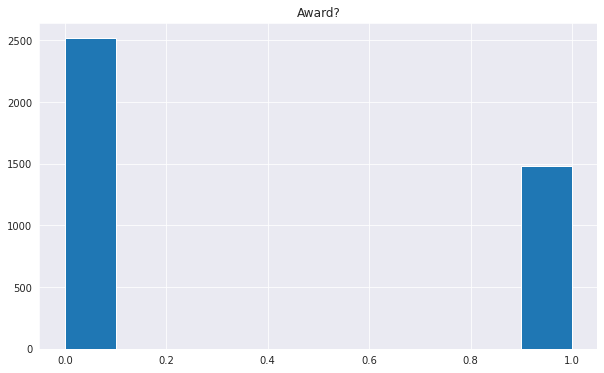

In [17]:
for i in data:
    plt.figure(figsize = (10,6))
    plt.hist(data[i])
    plt.title(i)
    plt.show()

#### Boxplot

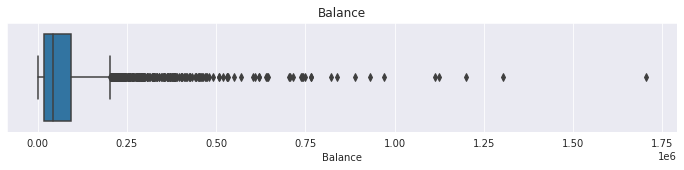

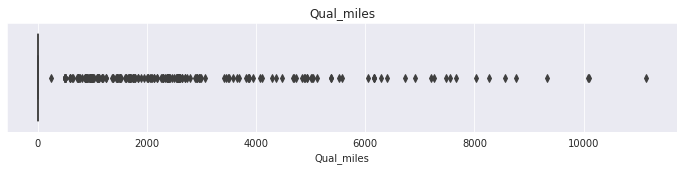

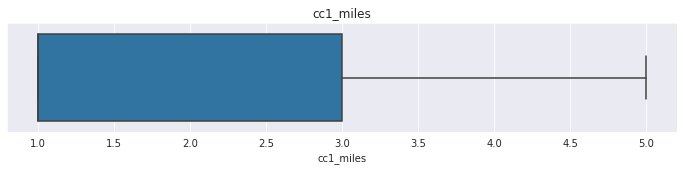

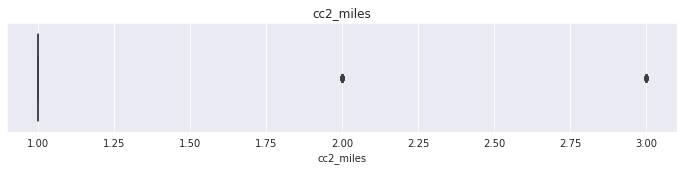

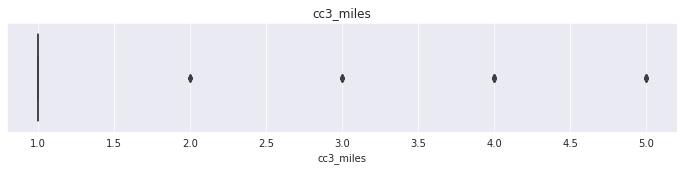

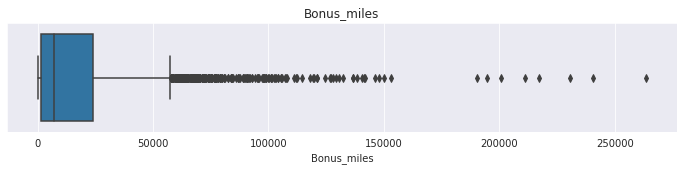

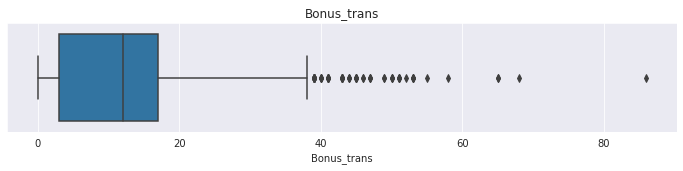

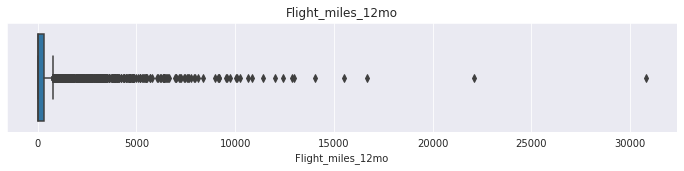

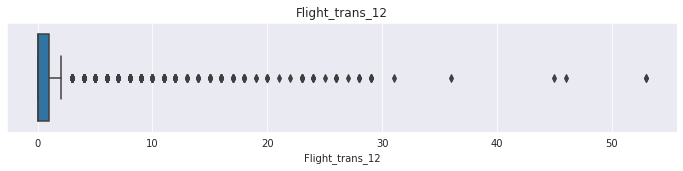

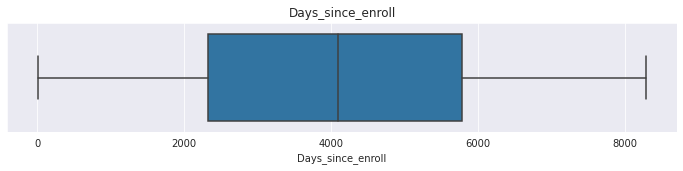

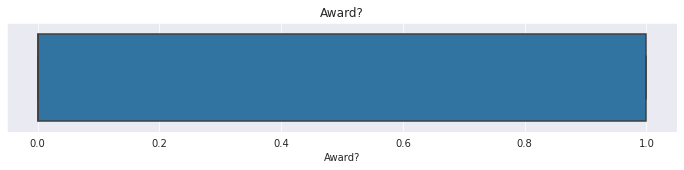

In [18]:
for i in data:
    plt.figure(figsize = (12,2))
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

# Clustering

## Hierarchical Clustering

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [20]:
#normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [21]:
#normalizing dataframe
df_norm = norm_func(data.iloc[:,1:])
df_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


### Creating Dendograms

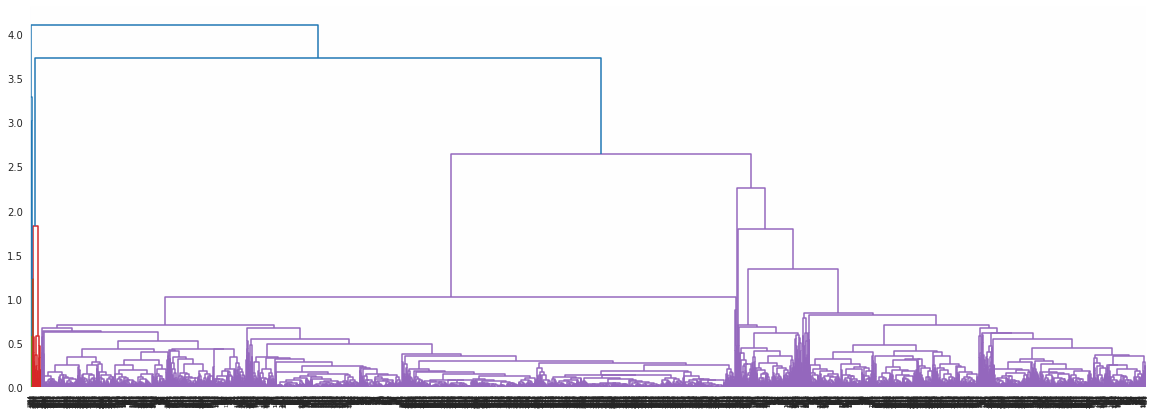

In [53]:
plt.figure(figsize= (20,7))
dendrogram = sch.dendrogram(sch.linkage(df_norm,method = "average"))
plt.show()

In [ ]:
plt.figure(figsize= (20,7))
dendrogram = sch.dendrogram(sch.linkage(df_norm,method = "single"))
plt.show()

In [ ]:
plt.figure(figsize= (20,7))
dendrogram = sch.dendrogram(sch.linkage(df_norm,method = "complete"))
plt.show()

### Buliding Agglomerative Clustering Model

In [25]:
#create clusters
avg_cluster = AgglomerativeClustering(n_clusters = 5,affinity="euclidean",linkage="average")
single_cluster= AgglomerativeClustering(n_clusters = 5,affinity="euclidean",linkage="single")
complete_cluster = AgglomerativeClustering(n_clusters = 5,affinity="euclidean",linkage="complete")

In [26]:
#save clusters for chart
avg_c = avg_cluster.fit_predict(df_norm)
single_c = single_cluster.fit_predict(df_norm)
complete_c = complete_cluster.fit_predict(df_norm)

In [27]:
df_norm['average'] = avg_c
df_norm['single'] = single_c
df_norm['complete'] = complete_c

In [28]:
df_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,average,single,complete
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1,0,0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1,0,0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1,0,0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1,0,0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0,1,2
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0,1,2
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0,1,2
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1,0,0


### Evaluation and Performance

In [29]:
from sklearn import metrics
avg = metrics.silhouette_score(df_norm,avg_c,metric = "euclidean")
single = metrics.silhouette_score(df_norm,single_c,metric = "euclidean")
complete = metrics.silhouette_score(df_norm,complete_c,metric = "euclidean")

In [30]:
silhoute_score = pd.DataFrame({"name":['average','single','complete'],"score":[avg,single,complete]})
silhoute_score

,name,score
0,average,0.753412
1,single,0.730008
2,complete,0.711623


#### Before Hierarchical clustering

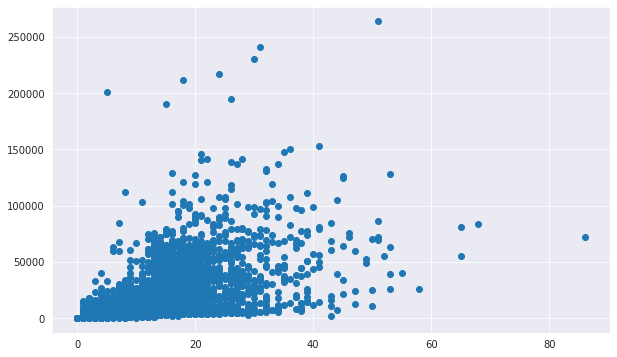

In [31]:
plt.figure(figsize= (10,6))
plt.scatter(data["Bonus_trans"],data["Bonus_miles"])
plt.show()

#### After Hierarchical Clustering

#### average

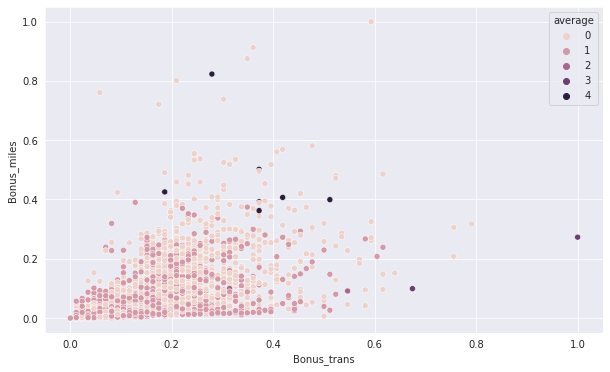

In [32]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = "Bonus_trans", y = "Bonus_miles", hue ="average", data =df_norm)
plt.show()

#### single 

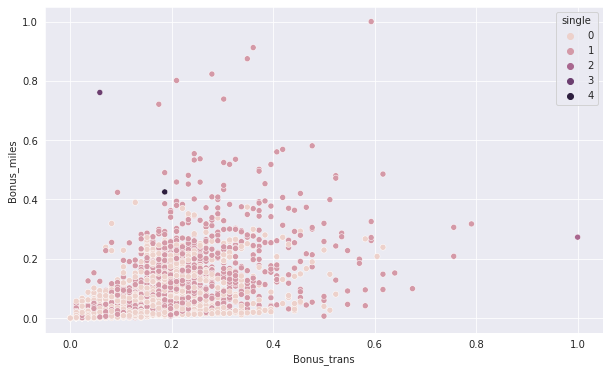

In [33]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = "Bonus_trans", y = "Bonus_miles", hue ="single", data =df_norm)
plt.show()

#### complete

#### complete

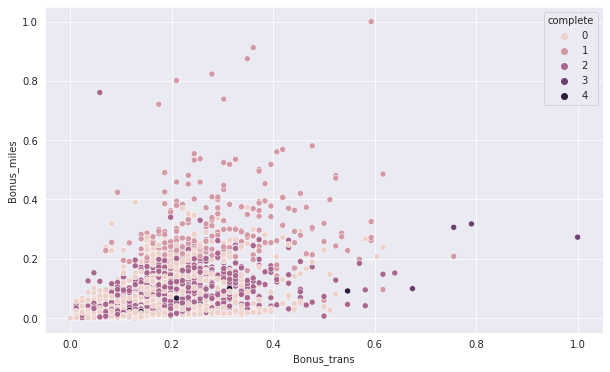

In [34]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = "Bonus_trans", y = "Bonus_miles", hue ="complete", data =df_norm)
plt.show()

## DBScan Clustering

In [35]:
from sklearn.preprocessing import StandardScaler
scaler_stand = StandardScaler()

In [36]:
scaled_data_df = scaler_stand.fit_transform(data.iloc[:,1:])

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
dbscan = DBSCAN(eps=1,min_samples = 7)
dbscan.fit(scaled_data_df)

DBSCAN(eps=1, min_samples=7)

In [39]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

## K-Means Clustering 

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 10)
kmeans.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=10)

In [41]:
kmeans.cluster_centers_

array([[-0.05838371, -0.5988215 ,  0.03030452, -0.06078264, -0.50729618,
        -0.47951669, -0.1808493 , -0.19377793, -0.19499152, -0.34505233],
       [ 0.02240712,  1.22656447, -0.0818409 , -0.05449778,  0.94227012,
         0.76706394, -0.0945377 , -0.10084418,  0.36890269,  0.59692523],
       [ 0.76227489,  0.06817472,  0.1510934 , -0.06276658,  0.58080182,
         1.60736614,  3.58028052,  3.83058357,  0.26257405,  0.89737338],
       [-0.08443292,  1.0220844 , -0.09824189, 15.64629931,  3.17969131,
         1.71461374,  0.03329269,  0.05969539,  0.23987261,  0.33752735]])

In [42]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [43]:
kmeans.inertia_

23772.745930408666

## Select the number of clusters

cluster size: 2 wcss: 31994.05934079658
cluster size: 3 wcss: 27514.811787685074
cluster size: 4 wcss: 23772.87056380881
cluster size: 5 wcss: 20301.459456585602
cluster size: 6 wcss: 18344.471180477365
cluster size: 7 wcss: 15550.247825458417
cluster size: 8 wcss: 13959.67166969709
cluster size: 9 wcss: 12704.208041215803


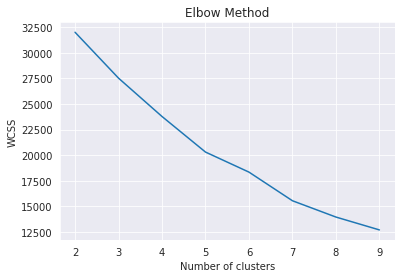

In [44]:
wcss = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    print("cluster size:",i,"wcss:",kmeans.inertia_)
    
plt.plot(range(2,10),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

#### sillouette_score 

In [45]:
metrics.silhouette_score(scaled_data_df,kmeans.labels_,metric= "euclidean")

0.28853313687411486

In [46]:
Sil_score = []
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_data_df)
    score = metrics.silhouette_score(scaled_data_df,kmeans.labels_,metric= "euclidean")
    Sil_score.append(score)
    print("cluster size:",i,"WCSS:",score)

cluster size: 2 WCSS: 0.3319356416389901
cluster size: 3 WCSS: 0.3240784893106218
cluster size: 4 WCSS: 0.3217022779082238
cluster size: 5 WCSS: 0.3380749954924667
cluster size: 6 WCSS: 0.23547021743671917
cluster size: 7 WCSS: 0.3073717646657763
cluster size: 8 WCSS: 0.2676299140690995
cluster size: 9 WCSS: 0.28853313687411486


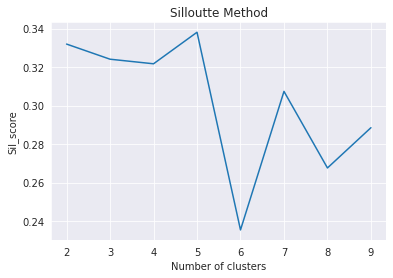

In [47]:
plt.plot(range(2,10),Sil_score)
plt.title("Silloutte Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil_score")
plt.show()

In [48]:
#build cluster algorithm
clusters_new = KMeans(4,random_state = 42)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=42)

In [49]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [50]:
clusters_new.n_iter_

9

## adding outputs in main DataFrame to compare all clusters

In [51]:
data["Algometrive_avg_clusters"] = avg_c
data["Algometrive_single_clusters"] = single_c
data["Algometrive_complete_clusters"] = complete_c
data["Dbscan_clusters"] = dbscan.labels_
data["Kmeans_clusters"] = clusters_new.labels_

In [52]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Algometrive_avg_clusters,Algometrive_single_clusters,Algometrive_complete_clusters,Dbscan_clusters,Kmeans_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,2,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1,2,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,2,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0,0,0
